In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('zhengqi_train.txt',sep="\t")
test_data = pd.read_csv('zhengqi_test.txt',sep="\t")

In [3]:
train_data.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   

     V29    V30    V31    V32    V33    V34    V35    V36    V37  target  
0  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175  
1 -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676  
2 -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633  
3  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206  
4  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384  

[5 rows x 39 columns]

In [4]:
test_data.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904  ...   
1  0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904  ...   

     V28    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0 -0.449  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388  
1 -0.443  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104  
2 -0.458 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569  
3 -0.456 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391  
4 -0.458 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497  

[5 rows x 38 columns]

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [6]:
train_data.describe()

V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452  ...   
std       0.517957     0.918054     0.955116     0.895444     0.953813  ...   
min      -2.182000    -4.576000    -5.048000    -4.692000   -12.891000  ...   
25%      -0.853000    -0.310000    -0.295000    -0.159000    -0.390000  ...   
50%      -0.466000     0.388000     0.344000     0.362000     0.042000  ...   
75%      -0.154000     0.831250     0.782250     0.726000     0.042000  ...   
max       0.489000     1.895000     1.918000     2.245000     1.335000  ...   

               V29          V30          V31          V32          V33  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.097648     0.055477     0.127791     0.020806     0.007801   
std       1.061200     0.901934     0.873028     0.902584     1.006995   
min      -2.912000    -4.507000    -5.859000    -4.053000    -4.627000   
25%      -0.664000    -0.283000    -0.170250    -0.407250    -0.499000   
50%      -0.023000     0.053500     0.299500     0.039000    -0.040000   
75%       0.745250     0.488000     0.635000     0.557000     0.462000   
max       4.580000     2.689000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  
mean      0.006715     0.197764     0.030658    -0.130330     0.126353  
std       1.003291     0.985675     0.970812     1.017196     0.983966  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.202500    -0.413000    -0.798250    -0.350250  
50%       0.160000     0.364000     0.137000    -0.185500     0.313000  
75%       0.273000     0.602000     0.644250     0.495250     0.793250  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

In [7]:
test_data.describe()

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.184404    -0.083912    -0.434762     0.101671    -0.019172   
std       1.073333     1.076670     0.969541     1.034925     1.147286   
min      -4.814000    -5.488000    -4.283000    -3.276000    -4.921000   
25%      -0.664000    -0.451000    -0.978000    -0.644000    -0.497000   
50%       0.065000     0.195000    -0.267000     0.220000     0.118000   
75%       0.549000     0.589000     0.278000     0.793000     0.610000   
max       2.100000     2.120000     1.946000     2.603000     4.475000   

                V5           V6           V7           V8           V9  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.838049    -0.274092    -0.173971    -0.266709     0.255114  ...   
std       0.963043     1.054119     1.040101     1.085916     1.014394  ...   
min      -1.168000    -5.649000    -5.625000    -6.059000    -6.784000  ...   
25%       0.122000    -0.732000    -0.509000    -0.775000    -0.390000  ...   
50%       0.437000    -0.082000     0.018000    -0.004000     0.401000  ...   
75%       1.928000     0.457000     0.515000     0.482000     0.904000  ...   
max       3.176000     1.528000     1.394000     2.408000     1.766000  ...   

               V28          V29          V30          V31          V32  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.206871    -0.146463    -0.083215    -0.191729    -0.030782   
std       1.064140     0.880593     1.126414     1.138454     1.130228   
min      -2.435000    -2.413000    -4.507000    -7.698000    -4.057000   
25%      -0.453000    -0.818000    -0.339000    -0.476000    -0.472000   
50%      -0.445000    -0.199000     0.010000     0.100000     0.155000   
75%      -0.434000     0.468000     0.447000     0.471000     0.627000   
max       4.656000     3.022000     3.139000     1.428000     2.299000   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011433    -0.009985    -0.296895    -0.046270     0.195735  
std       0.989732     0.995213     0.946896     1.040854     0.940599  
min      -4.627000    -4.789000    -7.477000    -2.608000    -3.346000  
25%      -0.460000    -0.290000    -0.349000    -0.593000    -0.432000  
50%      -0.040000     0.160000    -0.270000     0.083000     0.152000  
75%       0.419000     0.273000     0.364000     0.651000     0.797000  
max       5.465000     5.110000     1.671000     2.861000     3.021000  

[8 rows x 38 columns]

### EDA

<AxesSubplot:xlabel='V0'>

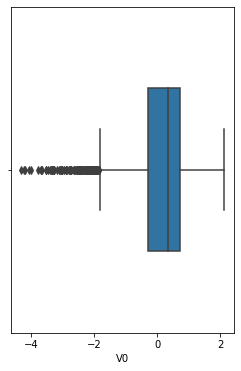

In [8]:
# 1箱型图
fig = plt.figure(figsize=(4,6))
sns.boxplot(train_data['V0'],orient="v",width=0.5)

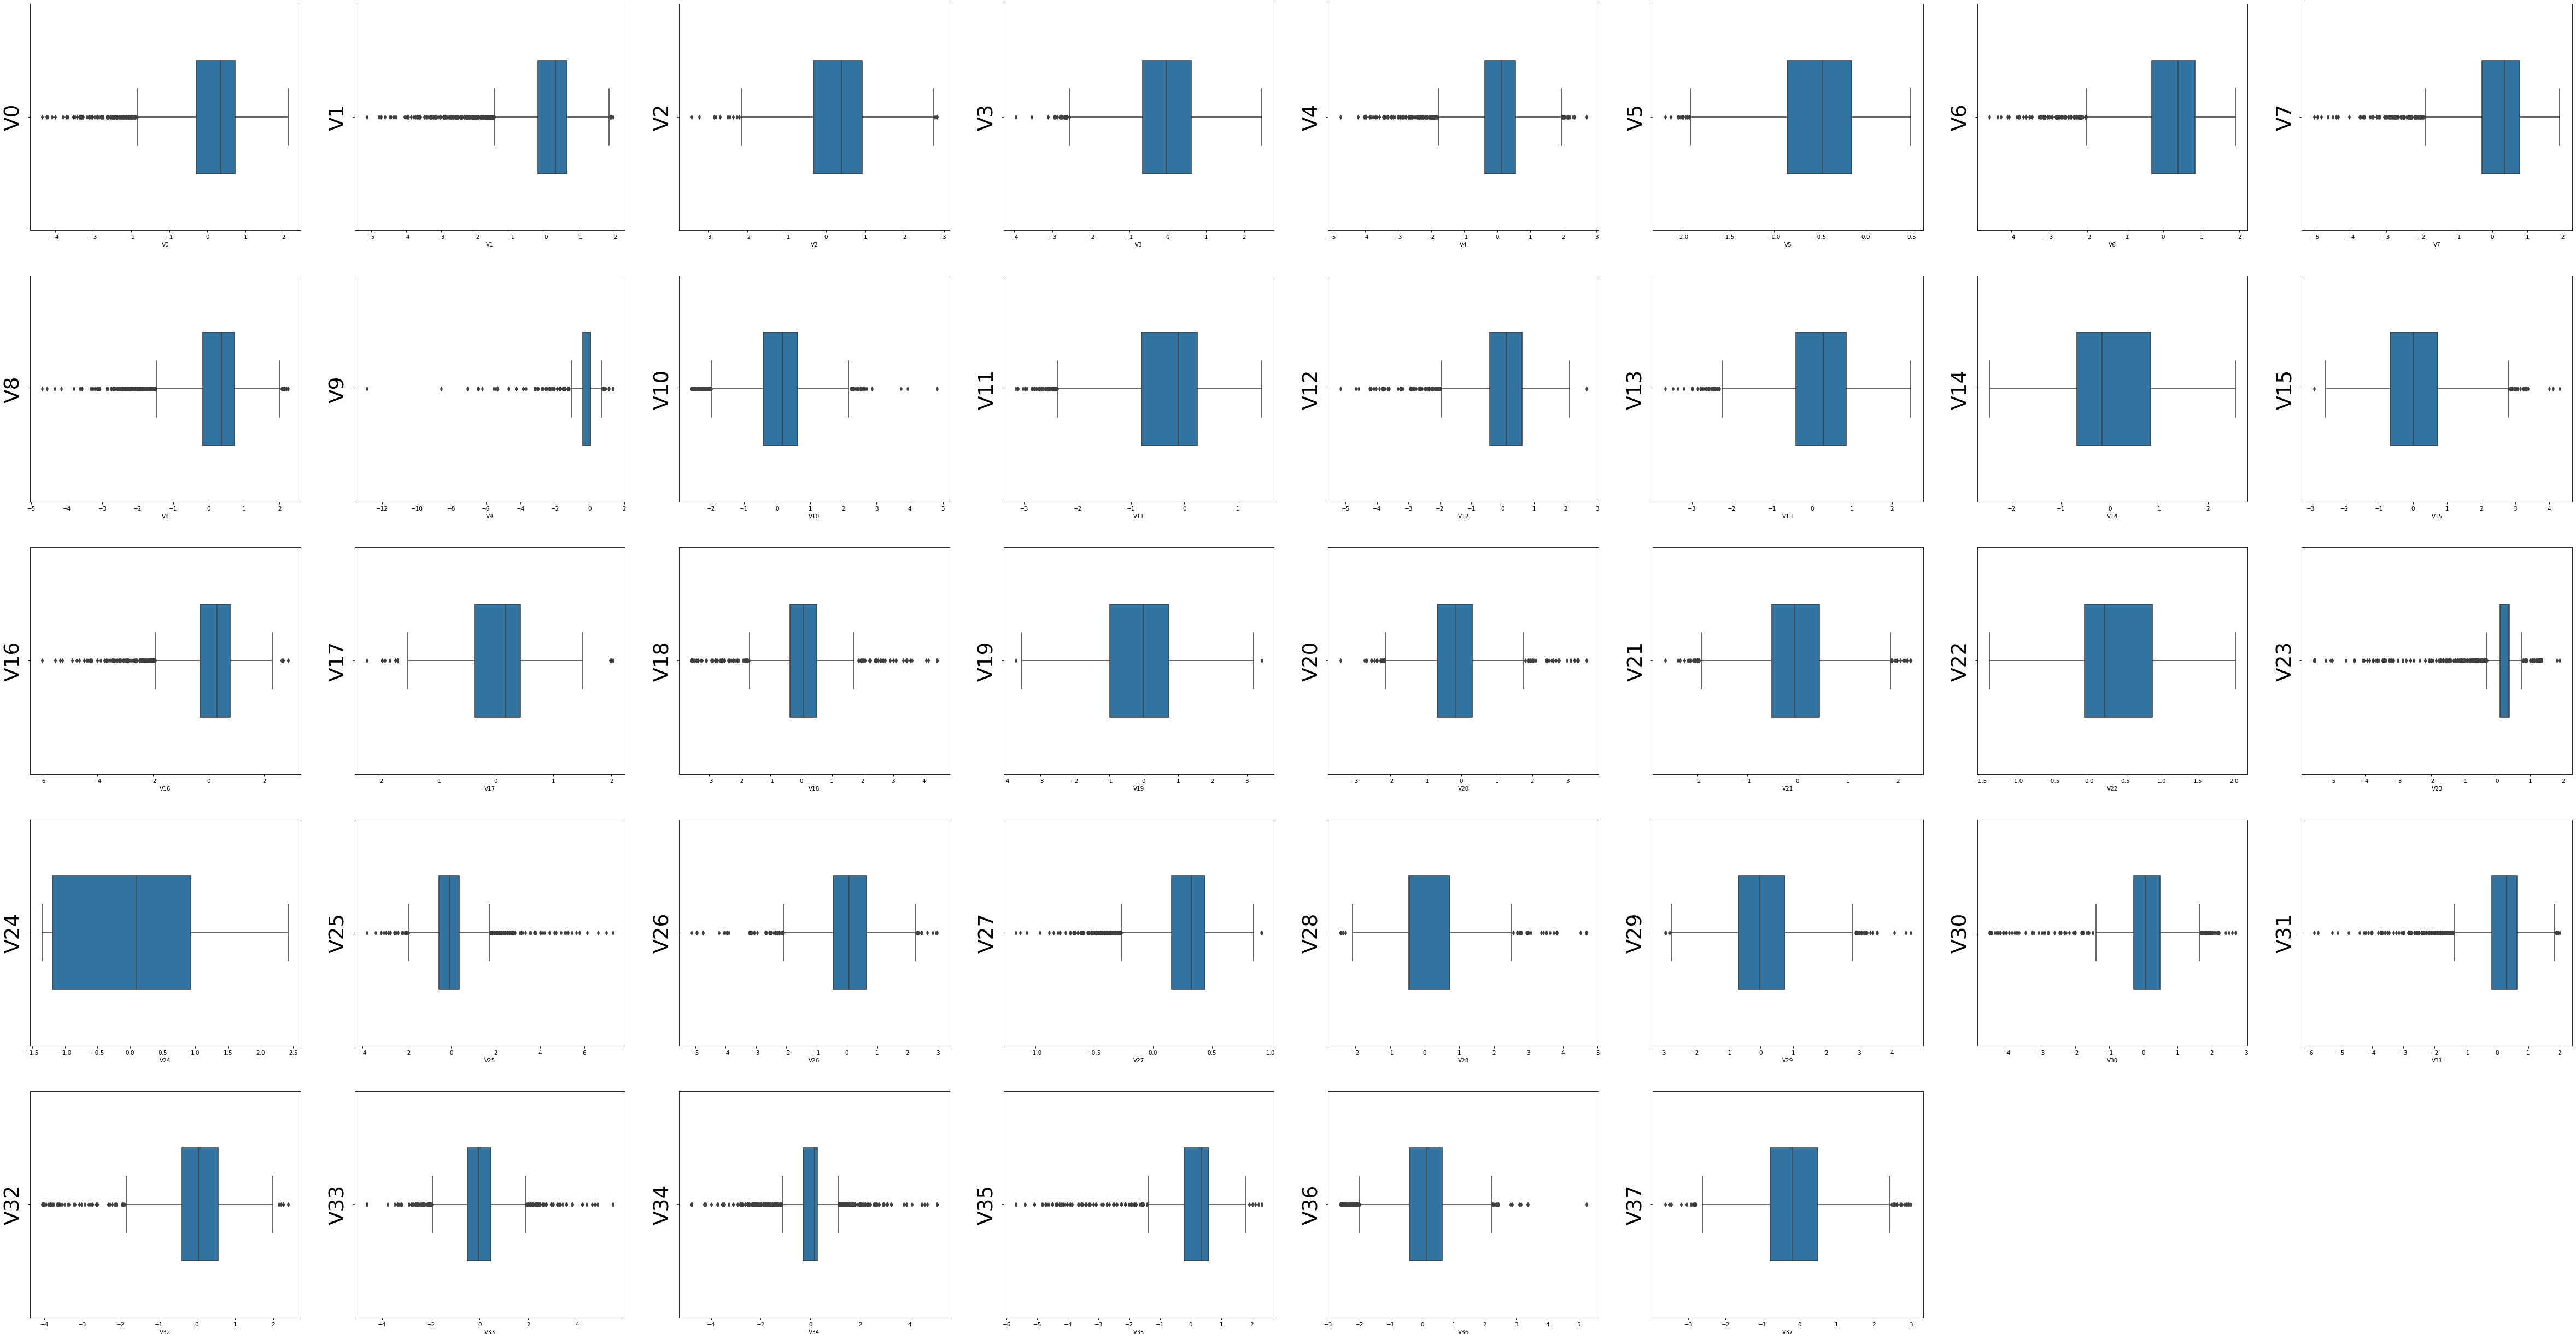

In [9]:
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(80,60),dpi=75)
for i in range(38):
    plt.subplot(7,8,i+1) # 7行8列子图
    sns.boxplot(train_data[column[i]],orient='v',width=0.5)
    plt.ylabel(column[i],fontsize=36)

In [10]:
from sklearn.metrics import mean_squared_error
# function to detect outliers based on the predictions of a model
def find_outliers(model,X,y,sigma=3):
    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X),index=y.index)
    # if predicting fails,try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X),index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # calculate z statistic,define outliers to be where |z|>sigma
    z = (resid-mean_resid)/std_resid
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2 =',model.score(X,y))
    print('mse=',mean_squared_error(y,y_pred))
    print("-----------------------------------")
    
    print("mean of residuals:", mean_resid)
    print("std of residuals:",std_resid)
    print("-----------------------------------")
    
    print(len(outliers),'outliers:')
    print(outliers.tolist())
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    
    ax_133 = plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    return outliers

R2 = 0.8890858938210386
mse= 0.10734857773123631
-----------------------------------
mean of residuals: 1.8068033988013282e-17
std of residuals: 0.3276976673193502
-----------------------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


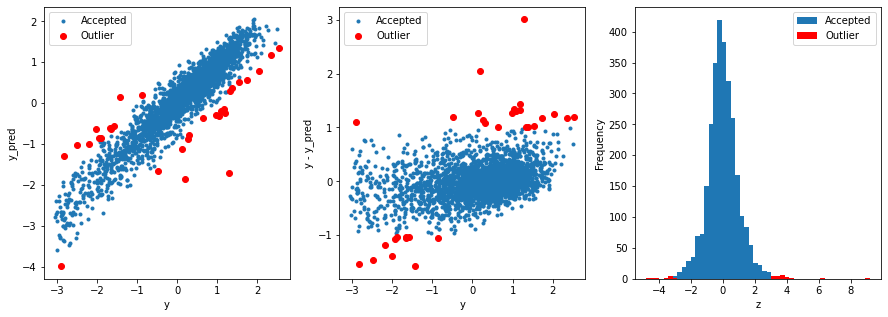

In [11]:
# 通过岭回归找出异常值
from sklearn.linear_model import Ridge
x_train = train_data.iloc[:,0:-1]
y_train = train_data.iloc[:,-1]
outliers = find_outliers(Ridge(),x_train,y_train)

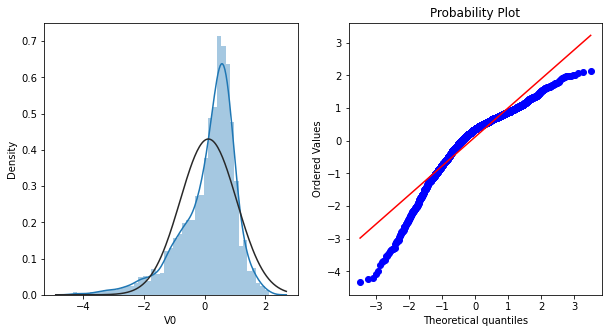

In [12]:
from scipy import stats 
plt.figure(figsize=(10,5)) # Q-Q图 查看分布是否近似于正态分布
ax=plt.subplot(1,2,1)
sns.distplot(train_data['V0'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(train_data['V0'],plot=plt)

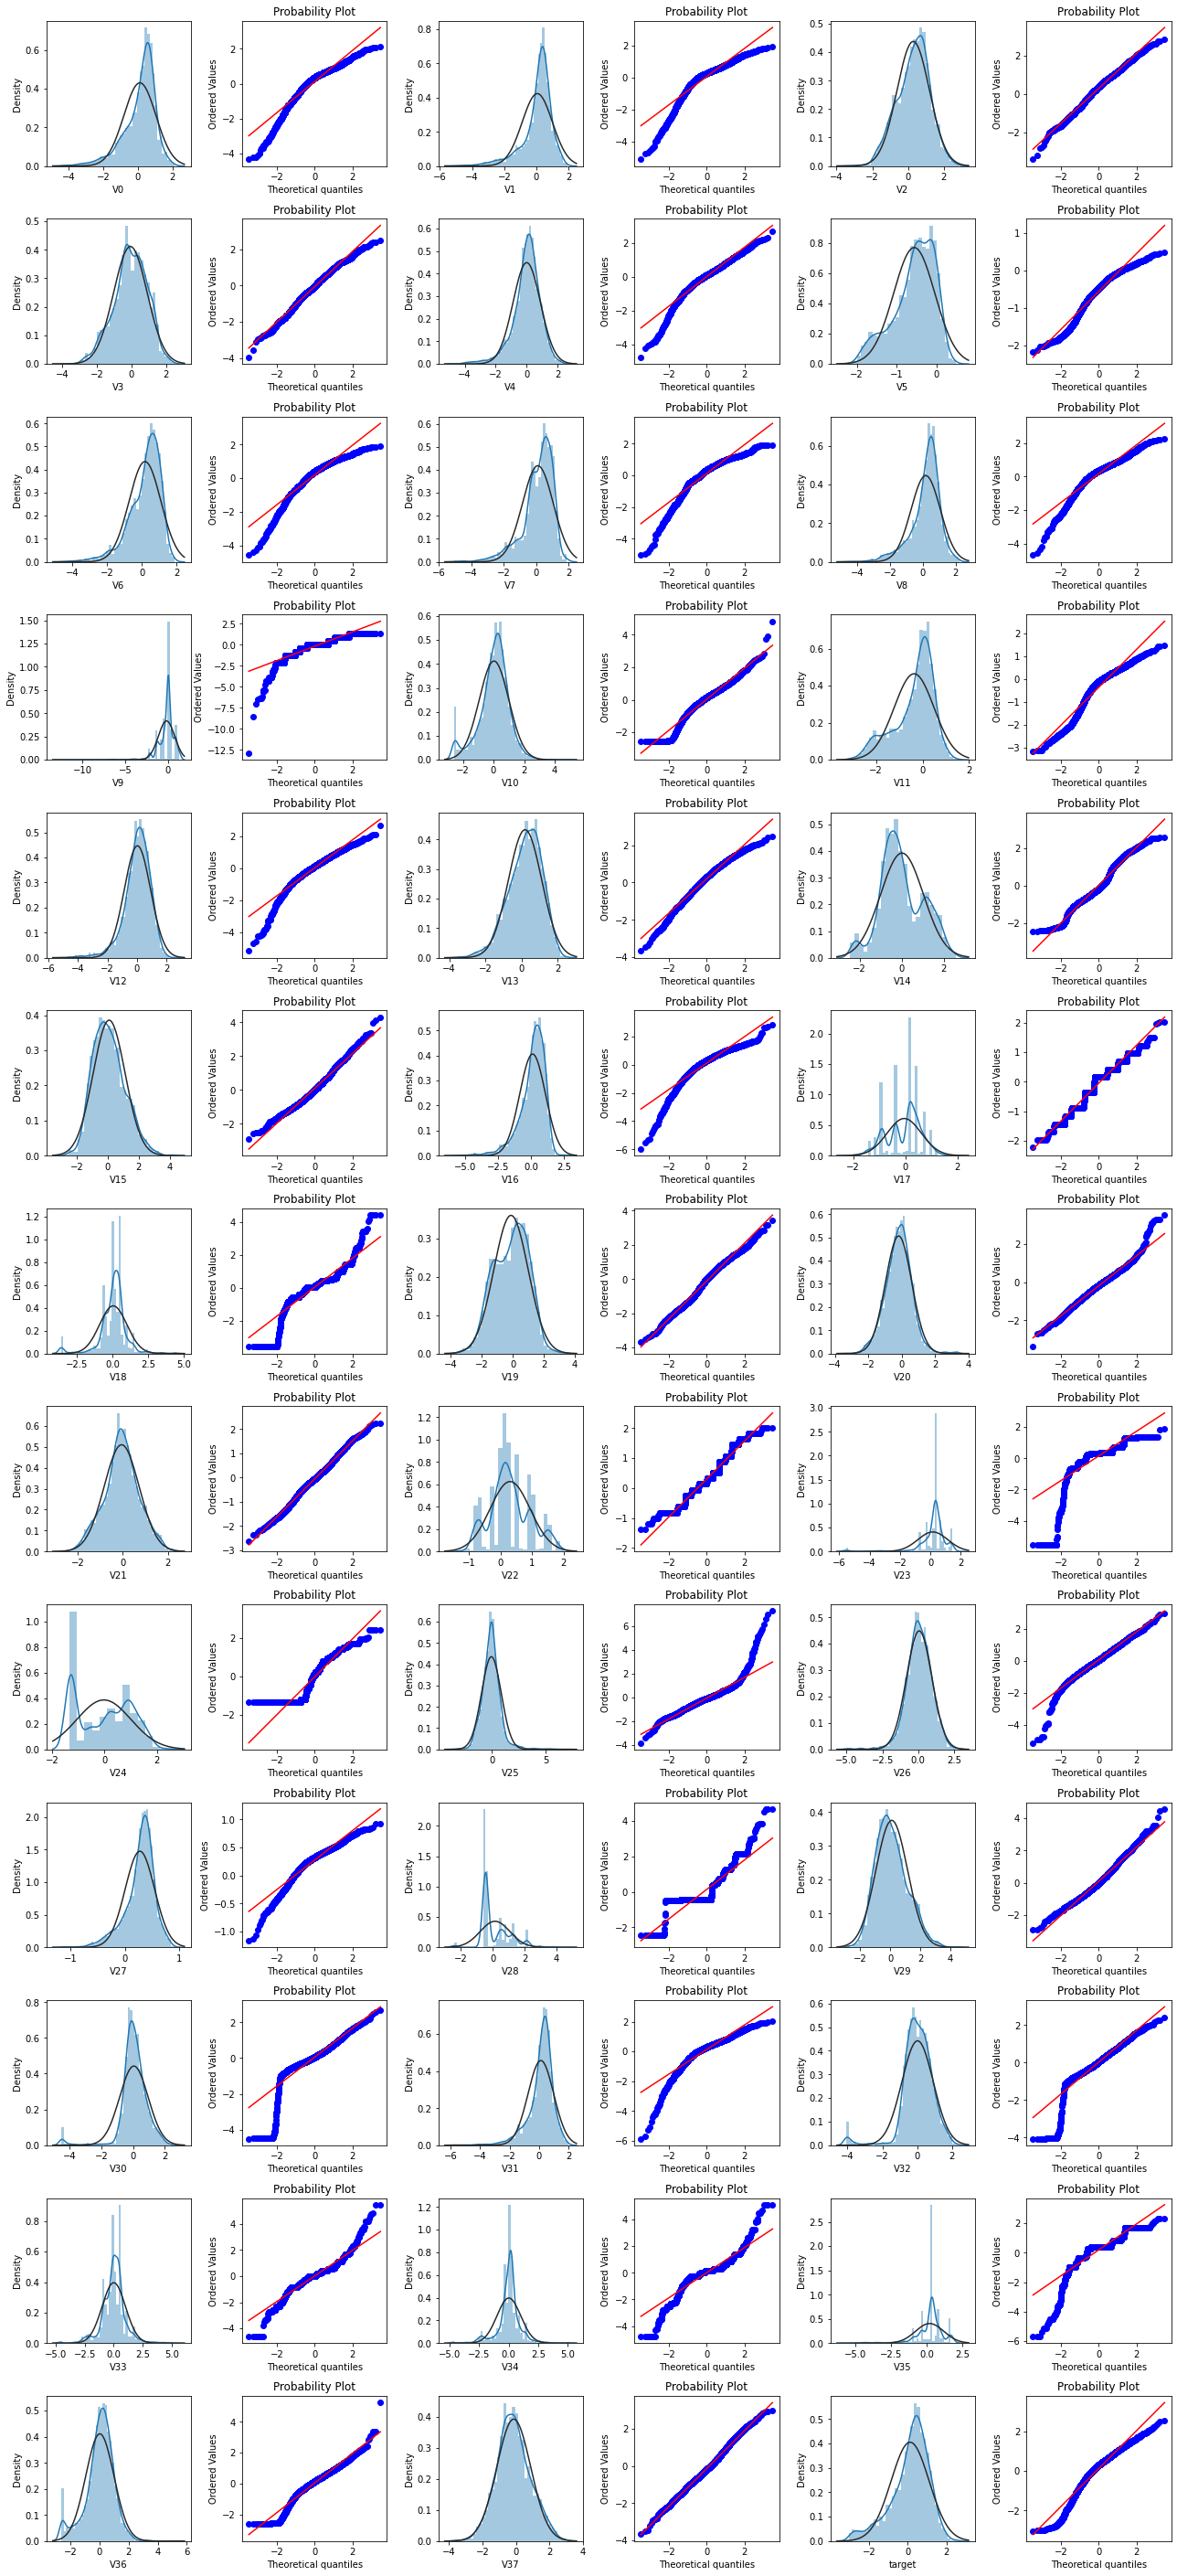

In [13]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(3*train_cols,3*train_rows))

i=0
for col in train_data.columns:
    i+=1
    ax = plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    ax = plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col],plot=plt)
plt.tight_layout()

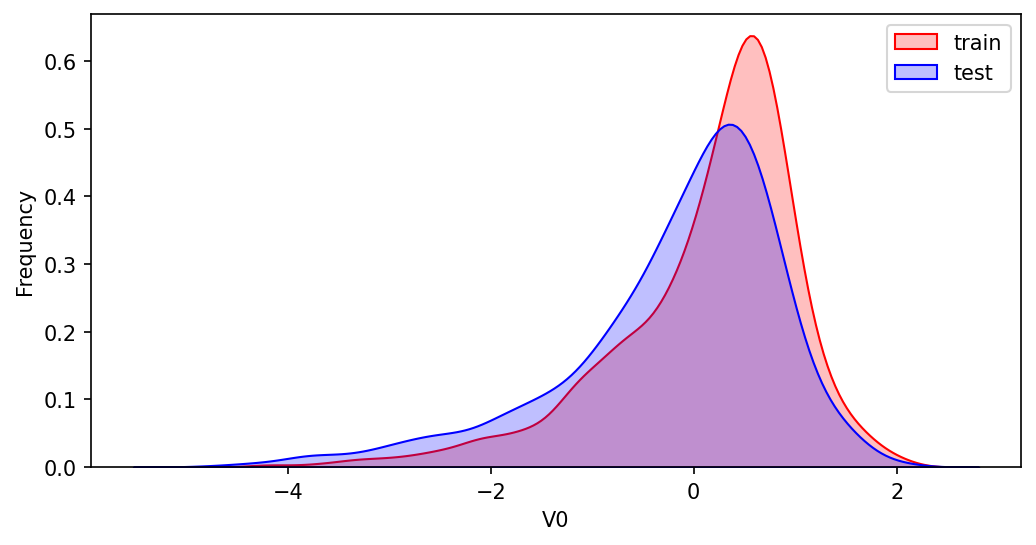

In [14]:
# KDE分布图（核密度估计） 对比训练集和测试集中特征变量的分布情况
plt.figure(figsize=(8,4),dpi=150)
ax = sns.kdeplot(train_data['V0'],color='Red',shade=True)
ax = sns.kdeplot(test_data['V0'],color='Blue',shade=True)
ax.set_xlabel('V0')
ax.set_ylabel('Frequency')
ax = ax.legend(['train','test'])

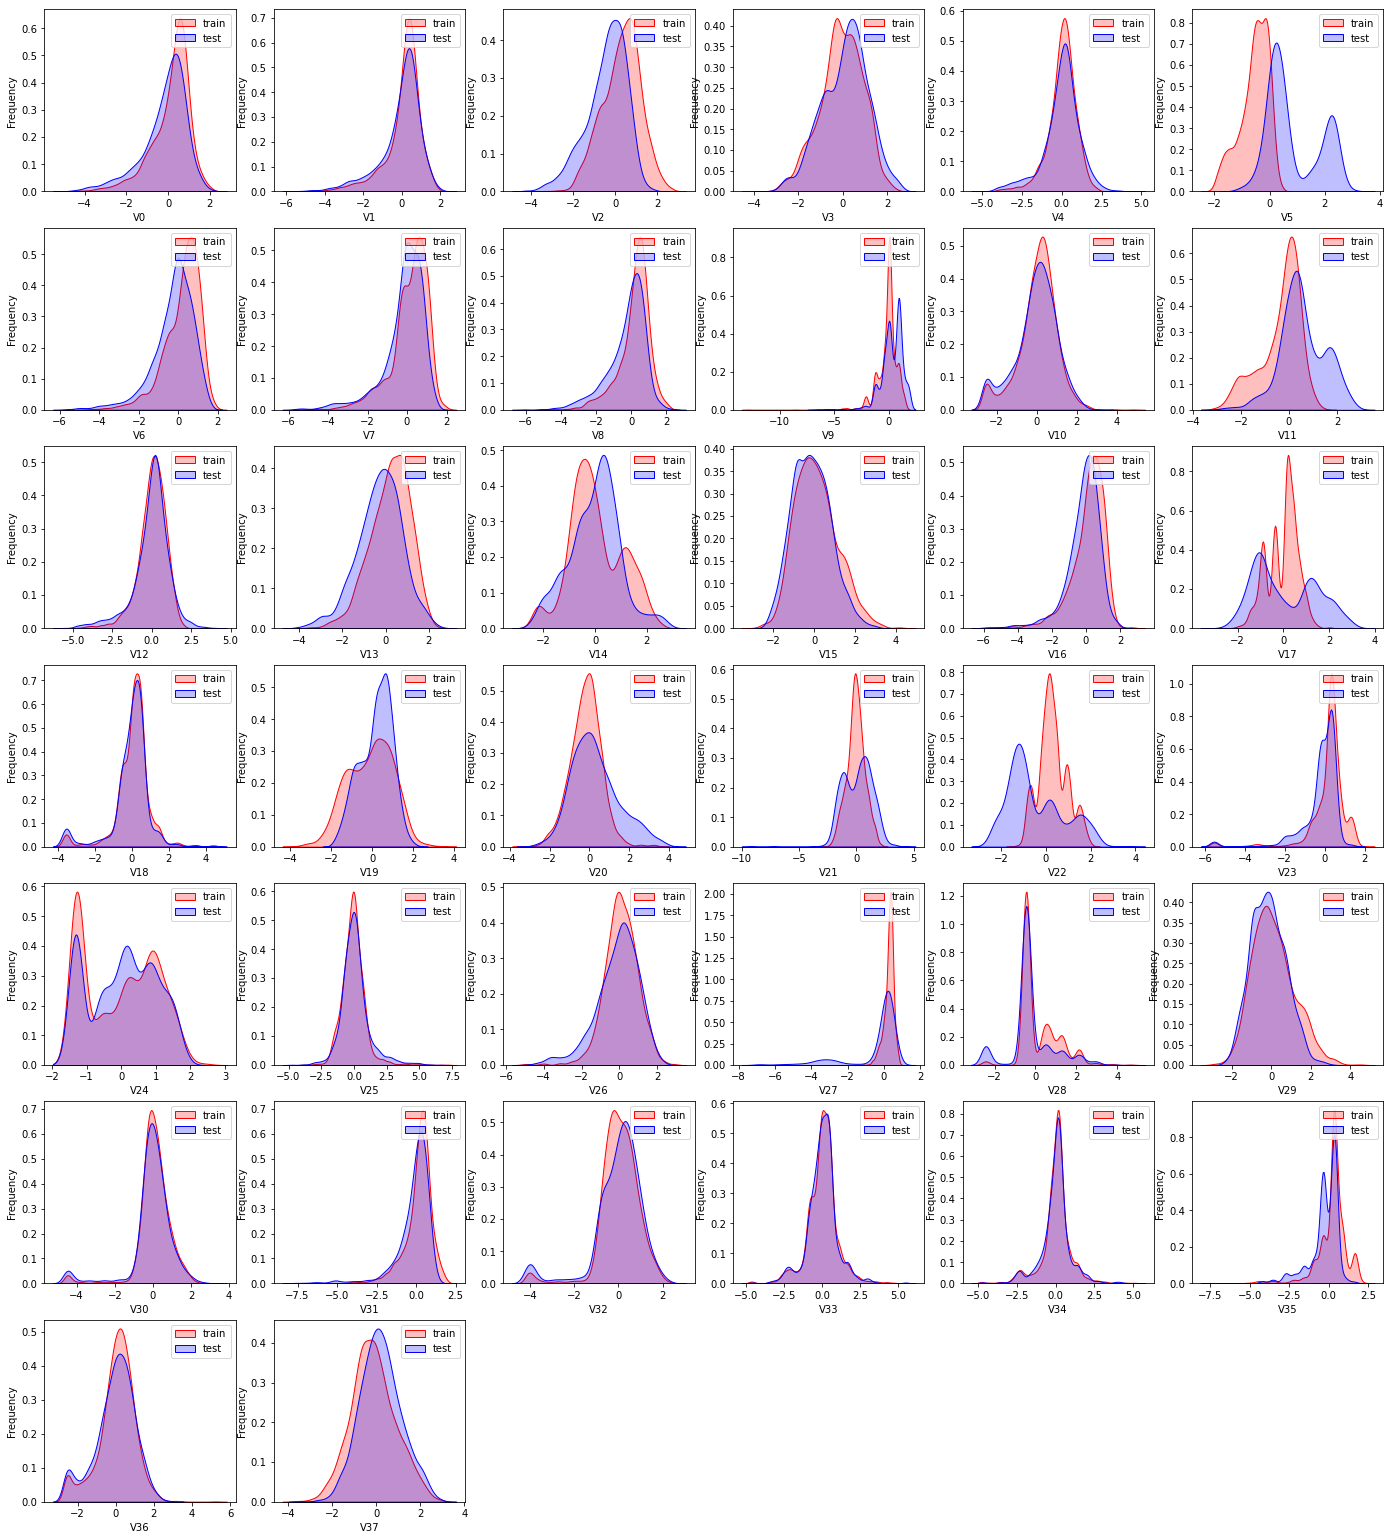

In [15]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))
i=1
for col in test_data.columns:
    ax = plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(train_data[col],color='Red',shade=True)
    ax = sns.kdeplot(test_data[col],color='Blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['train','test'])
    i+=1

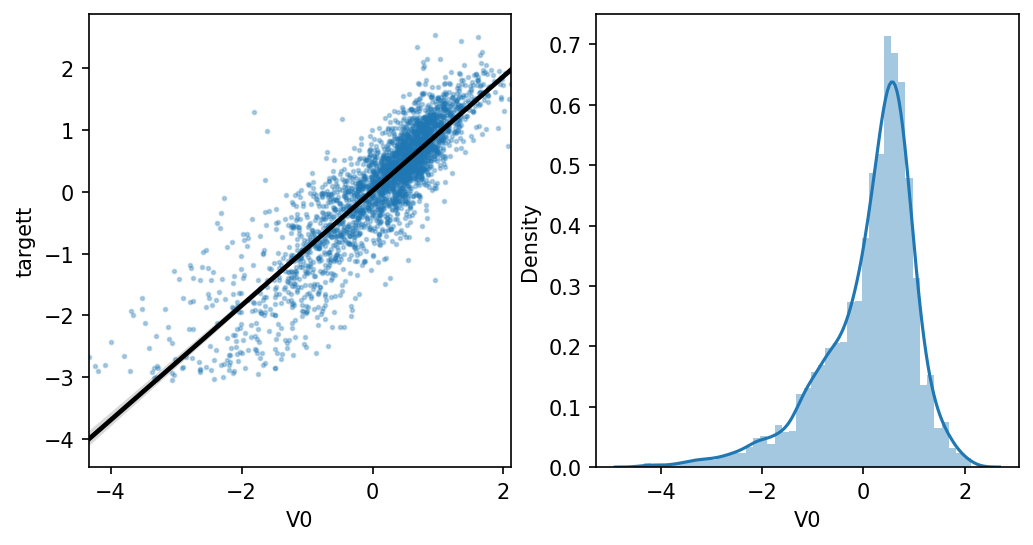

In [16]:
fcols=2
frows=1
plt.figure(figsize=(8,4),dpi=150)

ax = plt.subplot(1,2,1)
sns.regplot(x='V0',y='target',data=train_data,ax=ax,scatter_kws={'marker':'.','s':3,'alpha':0.3},line_kws={'color':'k'})
plt.xlabel('V0')
plt.ylabel('targett')

ax = plt.subplot(1,2,2)
sns.distplot(train_data['V0'].dropna())
plt.show()

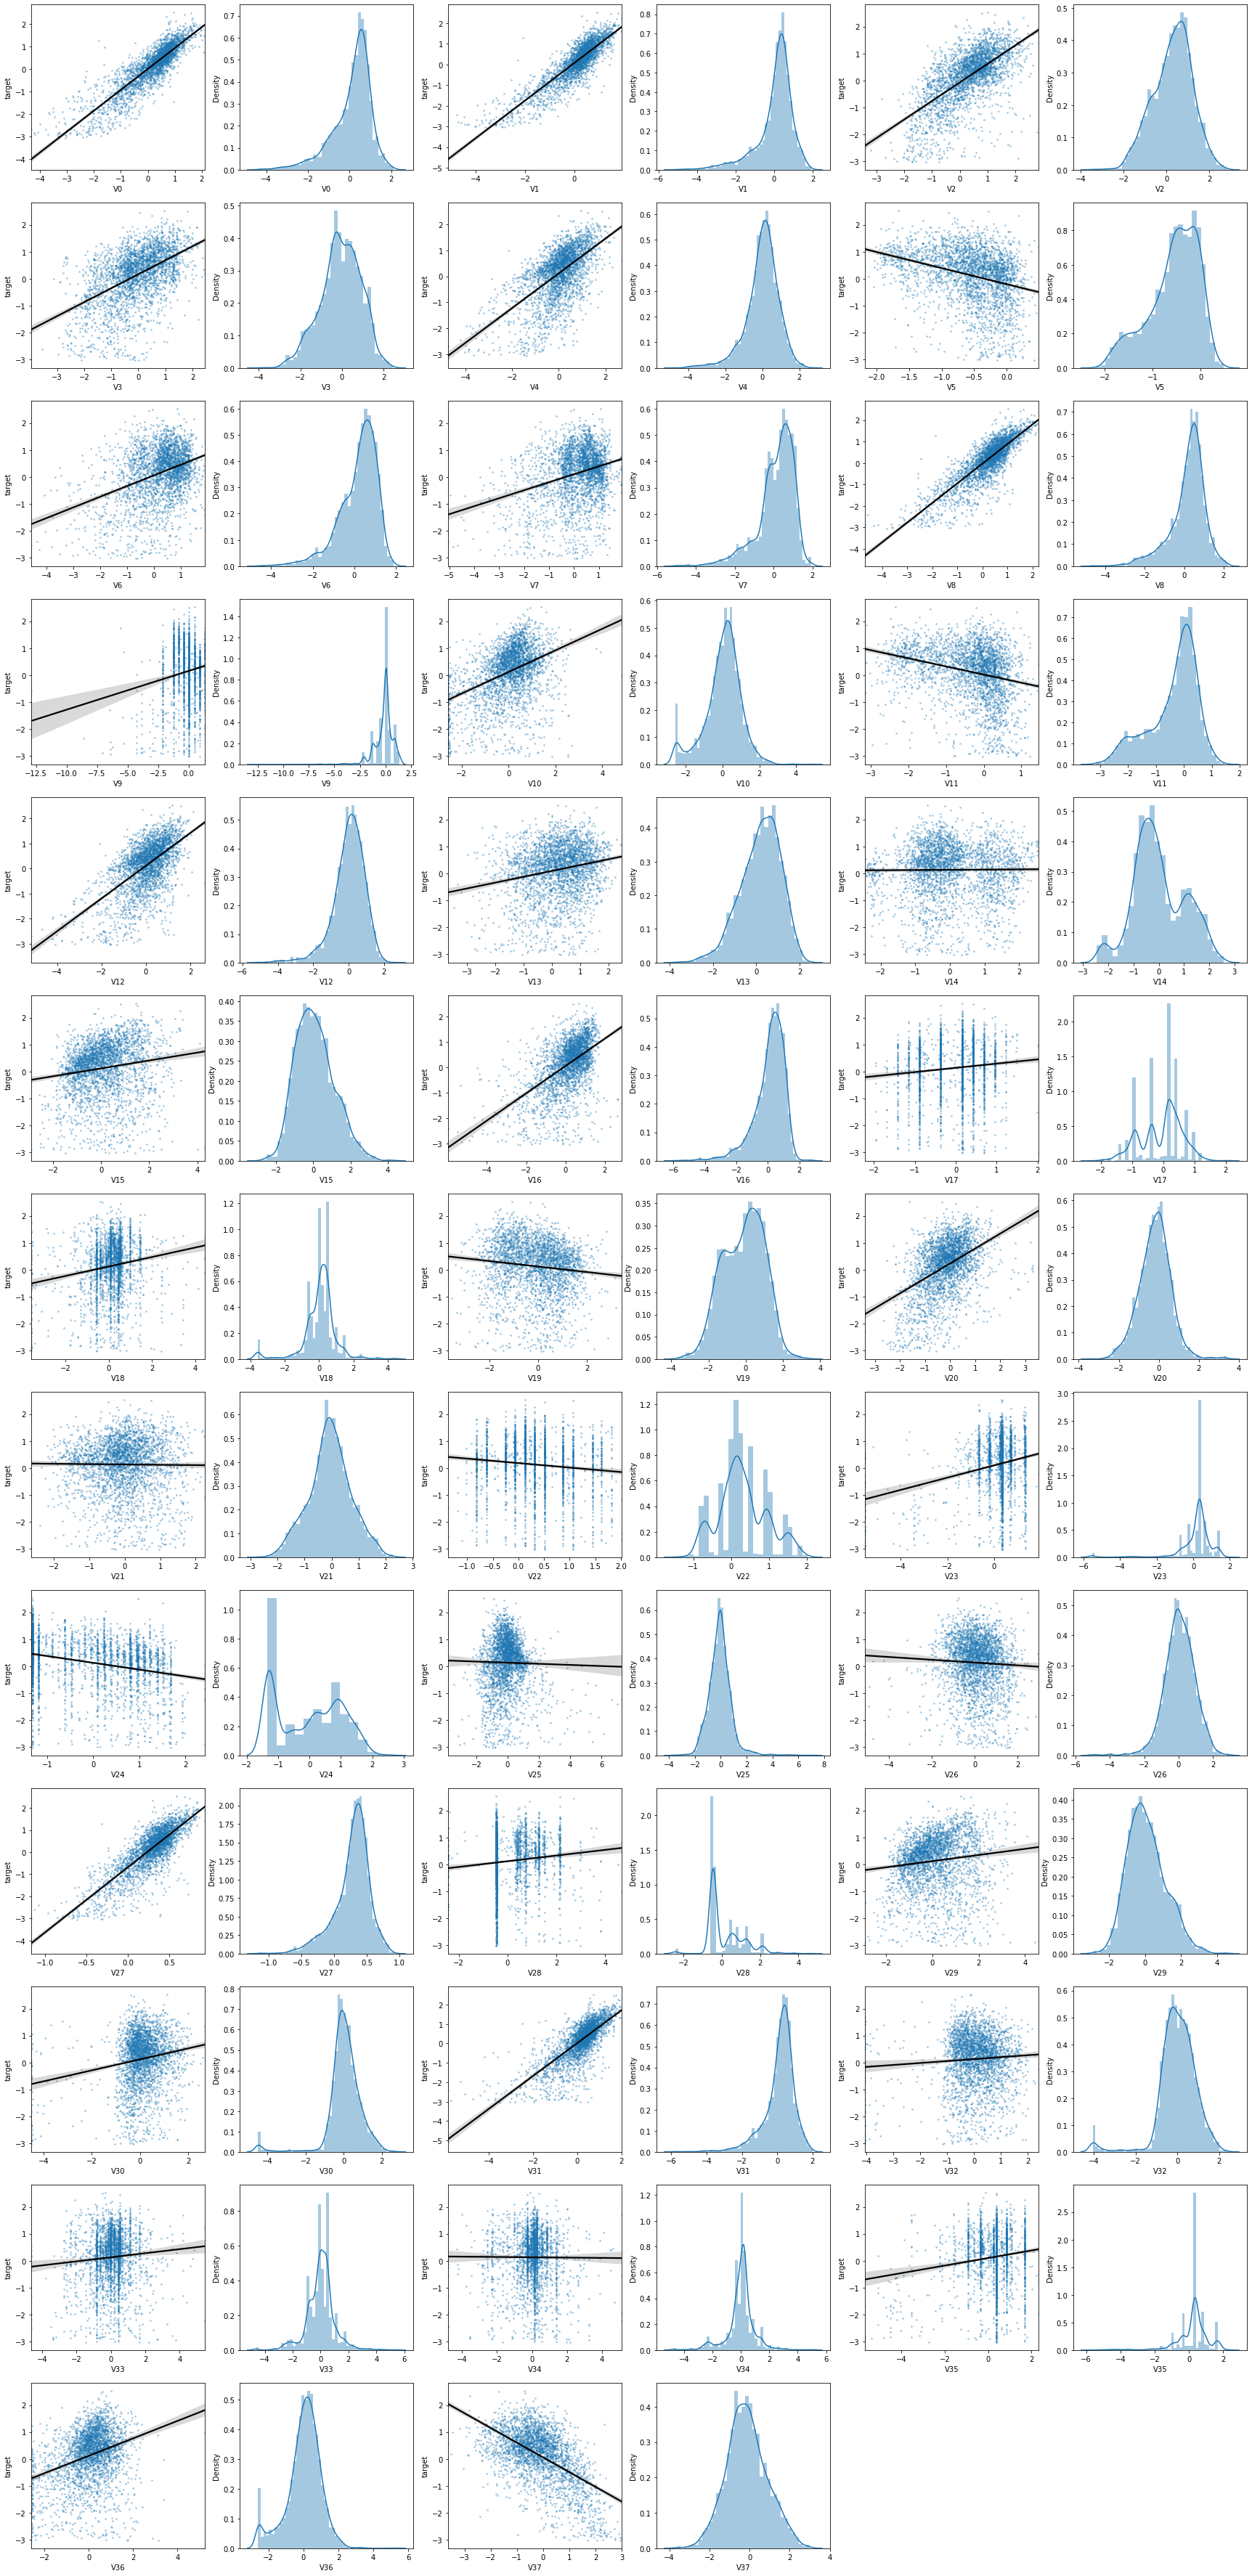

In [17]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols,5*frows))

i=0
for col in test_data.columns:
    i+=1
    ax = plt.subplot(frows,fcols,i)
    sns.regplot(x=col,y='target',data=train_data,ax=ax,scatter_kws={'marker':'.','s':3,'alpha':0.3},line_kws={'color':'k'})
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax =plt.subplot(frows,fcols,i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

In [18]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1) # 删除训练集和测试集不一致的数据
train_corr=data_train1.corr()
train_corr

V0        V1        V2        V3        V4  ...       V34  \
V0      1.000000  0.908607  0.463643  0.409576  0.781212  ... -0.019342   
V1      0.908607  1.000000  0.506514  0.383924  0.657790  ... -0.029115   
V2      0.463643  0.506514  1.000000  0.410148  0.057697  ... -0.025620   
V3      0.409576  0.383924  0.410148  1.000000  0.315046  ... -0.031898   
V4      0.781212  0.657790  0.057697  0.315046  1.000000  ...  0.028659   
...          ...       ...       ...       ...       ...  ...       ...   
V34    -0.019342 -0.029115 -0.025620 -0.031898  0.028659  ...  1.000000   
V35     0.138933  0.146329  0.043648  0.080034  0.100010  ...  0.233616   
V36     0.231417  0.235299  0.316462  0.324475  0.113609  ... -0.019032   
V37    -0.494076 -0.494043 -0.734956 -0.229613 -0.031054  ... -0.006854   
target  0.873212  0.871846  0.638878  0.512074  0.603984  ... -0.006034   

             V35       V36       V37    target  
V0      0.138933  0.231417 -0.494076  0.873212  
V1      0.146329  0.235299 -0.494043  0.871846  
V2      0.043648  0.316462 -0.734956  0.638878  
V3      0.080034  0.324475 -0.229613  0.512074  
V4      0.100010  0.113609 -0.031054  0.603984  
...          ...       ...       ...       ...  
V34     0.233616 -0.019032 -0.006854 -0.006034  
V35     1.000000  0.025401 -0.077991  0.140294  
V36     0.025401  1.000000 -0.039478  0.319309  
V37    -0.077991 -0.039478  1.000000 -0.565795  
target  0.140294  0.319309 -0.565795  1.000000  

[33 rows x 33 columns]

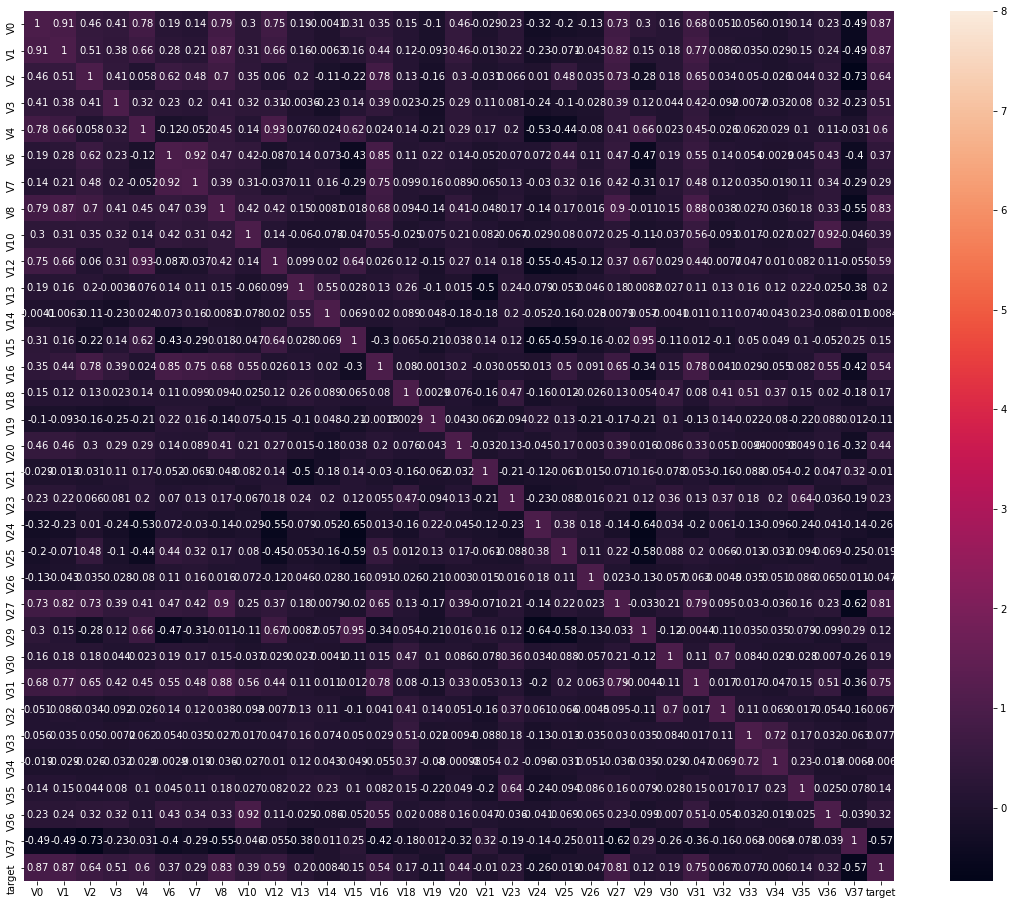

In [20]:
ax = plt.subplots(figsize=(20,16)) #调整画布大小
ax = sns.heatmap(train_corr,vmax=8,square=True,annot=True) # annot=True显示系数

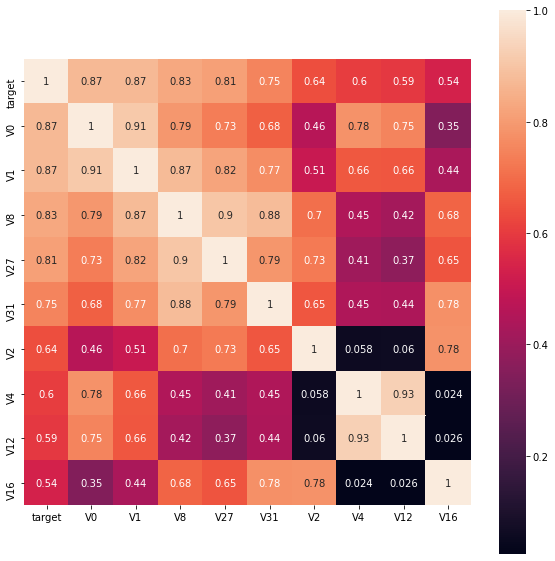

In [21]:
# 找10个与target最相关的特征变量
k=10
cols = train_corr.nlargest(k,'target')['target'].index
cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10,10)) 
hm = sns.heatmap(train_data[cols].corr(),annot=True,square=True)

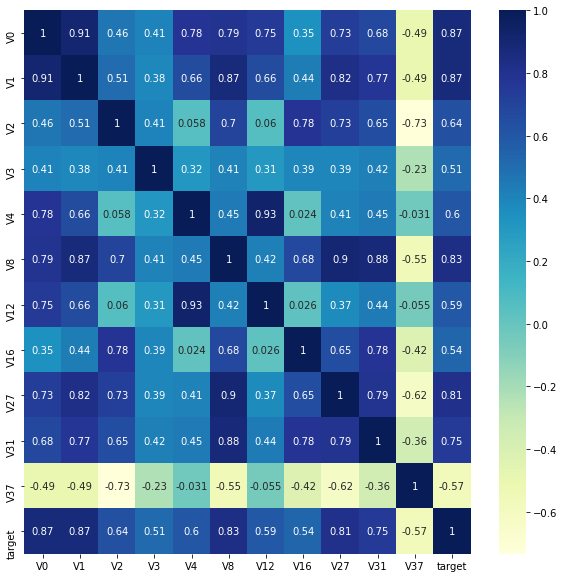

In [22]:
# 找出target变量的相关系数大于0.5的特征变量
threshold=0.5
corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat['target'])>threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap='YlGnBu')

In [23]:
threshold=0.5
corr_matrix=data_train1.corr().abs()
drop_col = corr_matrix[corr_matrix['target']<threshold].index
drop_col

Index(['V6', 'V7', 'V10', 'V13', 'V14', 'V15', 'V18', 'V19', 'V20', 'V21',
       'V23', 'V24', 'V25', 'V26', 'V29', 'V30', 'V32', 'V33', 'V34', 'V35',
       'V36'],
      dtype='object')

In [24]:
#  Box-Cox变换
drop_columns =['V5','V9','V11','V17','V22','V28']
# 合并训练集和测试集
train_x = train_data.drop(['target'],axis=1)
data_all =pd.concat([train_x,test_data])
data_all.drop(drop_columns,axis=1,inplace=True)
data_all.head()

V0     V1     V2     V3     V4  ...    V33    V34    V35    V36    V37
0  0.566  0.016 -0.143  0.407  0.452  ... -4.627 -4.789 -5.101 -2.608 -3.508
1  0.968  0.437  0.066  0.566  0.194  ... -0.843  0.160  0.364 -0.335 -0.730
2  1.013  0.568  0.235  0.370  0.112  ... -0.843  0.160  0.364  0.765 -0.589
3  0.733  0.368  0.283  0.165  0.599  ... -0.843 -0.065  0.364  0.333 -0.112
4  0.684  0.638  0.260  0.209  0.337  ... -0.843 -0.215  0.364 -0.280 -0.028

[5 rows x 32 columns]

In [25]:
cols_numeric = list(data_all.columns)

def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())
    
data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax,axis=0)
data_all[cols_numeric].describe()

V0           V1           V2           V3           V4  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.694172     0.721357     0.602300     0.603139     0.523743  ...   
std       0.144198     0.131443     0.140628     0.152462     0.106430  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626676     0.679416     0.514414     0.503888     0.478182  ...   
50%       0.729488     0.752497     0.617072     0.614270     0.535866  ...   
75%       0.790195     0.799553     0.700464     0.710474     0.585036  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V33          V34          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.458493     0.483790     0.762873     0.332385     0.545795  
std       0.099095     0.101020     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.409037     0.454490     0.727273     0.270584     0.445647  
50%       0.454518     0.499949     0.800020     0.347056     0.539317  
75%       0.500000     0.511365     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

In [26]:
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax,axis=0)

test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax,axis=0)

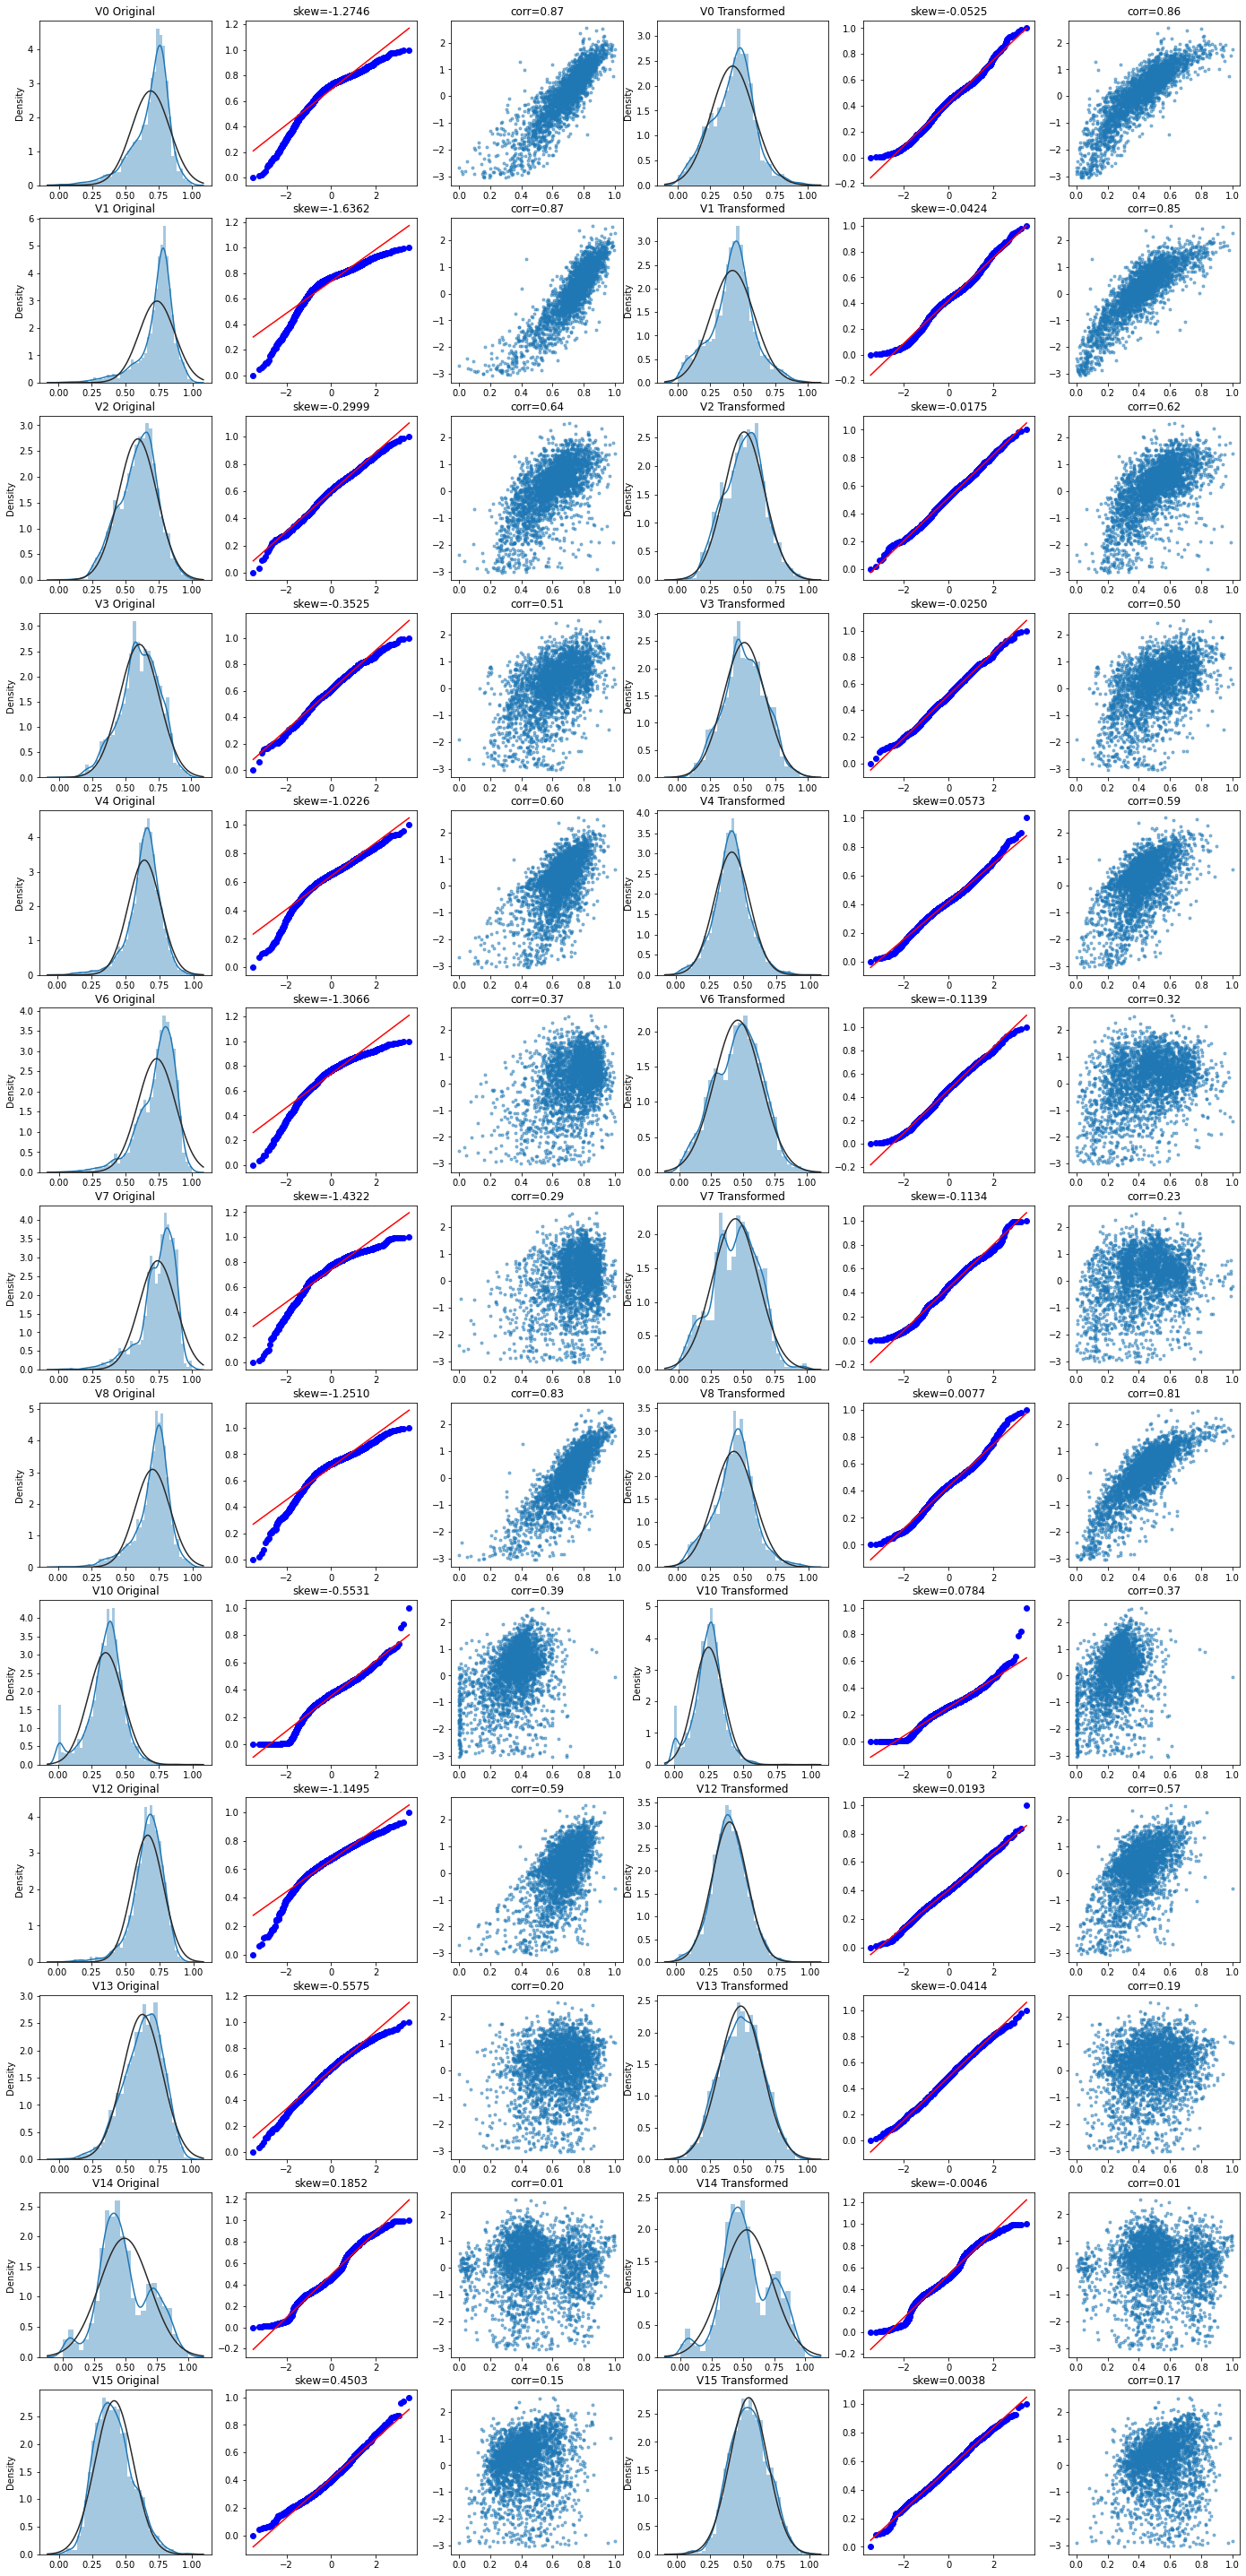

In [27]:
cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]
train_data_process = pd.concat([train_data_process,train_data['target']],axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric_left:
    dat = train_data_process[[var,'target']].dropna()
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var],fit=stats.norm)
    plt.title(var+' Original')
    plt.xlabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    _ = stats.probplot(dat[var],plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var],dat['target'],'.',alpha=0.5)
    plt.title('corr=' +'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var,lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var,fit=stats.norm)
    plt.title(var+' Transformed')
    plt.xlabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    _ = stats.probplot(trans_var,plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var,dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

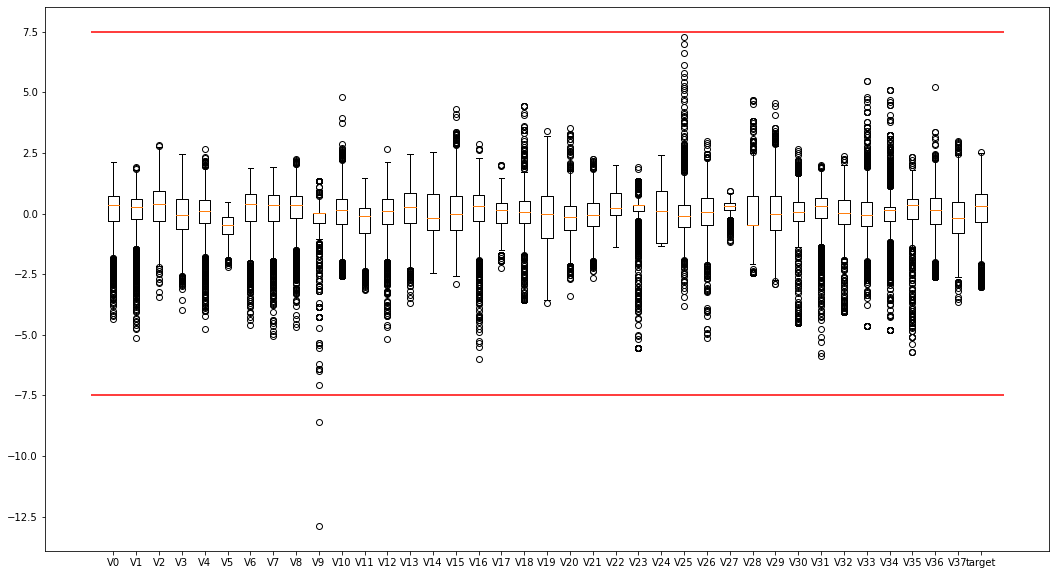

In [28]:
plt.figure(figsize=(18,10))
plt.boxplot(x=train_data.values,labels=train_data.columns)
plt.hlines([-7.5,7.5],0,40,colors='r')

In [148]:
train_data=train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]
display(train_data.describe())
display(test_data.describe())

V0           V1           V2           V3           V4  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.123725     0.056856     0.290340    -0.068364     0.012254  ...   
std       0.927984     0.941269     0.911231     0.970357     0.888037  ...   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000  ...   
25%      -0.292000    -0.224250    -0.310000    -0.652750    -0.385000  ...   
50%       0.359500     0.273000     0.386000    -0.045000     0.109500  ...   
75%       0.726000     0.599000     0.918750     0.623500     0.550000  ...   
max       2.121000     1.918000     2.828000     2.457000     2.689000  ...   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      0.006959     0.198513     0.030099    -0.131957     0.127451  
std       1.003411     0.985058     0.970258     1.015666     0.983144  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.199750    -0.412750    -0.798750    -0.347500  
50%       0.160000     0.364000     0.137000    -0.186000     0.314000  
75%       0.273000     0.602000     0.643750     0.493000     0.793750  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean     -0.184404    -0.083912    -0.434762     0.101671    -0.019172  ...   
std       1.073333     1.076670     0.969541     1.034925     1.147286  ...   
min      -4.814000    -5.488000    -4.283000    -3.276000    -4.921000  ...   
25%      -0.664000    -0.451000    -0.978000    -0.644000    -0.497000  ...   
50%       0.065000     0.195000    -0.267000     0.220000     0.118000  ...   
75%       0.549000     0.589000     0.278000     0.793000     0.610000  ...   
max       2.100000     2.120000     1.946000     2.603000     4.475000  ...   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011433    -0.009985    -0.296895    -0.046270     0.195735  
std       0.989732     0.995213     0.946896     1.040854     0.940599  
min      -4.627000    -4.789000    -7.477000    -2.608000    -3.346000  
25%      -0.460000    -0.290000    -0.349000    -0.593000    -0.432000  
50%      -0.040000     0.160000    -0.270000     0.083000     0.152000  
75%       0.419000     0.273000     0.364000     0.651000     0.797000  
max       5.465000     5.110000     1.671000     2.861000     3.021000  

[8 rows x 38 columns]

In [180]:
# 最大值最小值的归一化
# from sklearn import preprocessing

# features_columns = [col for col in train_data.columns if col not in ['target']]
# min_max_scaler = preprocessing.MinMaxScaler()
# min_max_scaler = min_max_scaler.fit(train_data[features_columns])

# train_data_scaler = min_max_scaler.transform(train_data[features_columns])
# test_data_scaler = min_max_scaler.transform(test_data[features_columns])

# train_data_scaler = pd.DataFrame(train_data_scaler)
# train_data_scaler.columns = features_columns

# test_data_scaler = pd.DataFrame(test_data_scaler)
# test_data_scaler.columns = features_columns
# train_data_scaler['target'] = train_data['target']

# display(train_data_scaler.describe())
# display(test_data_scaler.describe())

from sklearn import preprocessing

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

display(train_data_scaler.describe())
display(test_data_scaler.describe())

V0           V1           V2           V3           V4  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.690633     0.735633     0.593844     0.606212     0.639787  ...   
std       0.143740     0.133703     0.145844     0.151311     0.119504  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626239     0.695703     0.497759     0.515087     0.586328  ...   
50%       0.727153     0.766335     0.609155     0.609855     0.652873  ...   
75%       0.783922     0.812642     0.694422     0.714096     0.712152  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2884.000000  
mean      0.484489     0.734944     0.336235     0.527608     0.127274  
std       0.101365     0.122840     0.123663     0.153192     0.983462  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.454490     0.685279     0.279792     0.427036    -0.348500  
50%       0.499949     0.755580     0.349860     0.519457     0.313000  
75%       0.511365     0.785260     0.414447     0.621870     0.794250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.642905     0.715637     0.477791     0.632726     0.635558  ...   
std       0.166253     0.152936     0.155176     0.161379     0.154392  ...   
min      -0.074195    -0.051989    -0.138124     0.106035    -0.024088  ...   
25%       0.568618     0.663494     0.390845     0.516451     0.571256  ...   
50%       0.681537     0.755256     0.504641     0.651177     0.654017  ...   
75%       0.756506     0.811222     0.591869     0.740527     0.720226  ...   
max       0.996747     1.028693     0.858835     1.022766     1.240345  ...   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      0.457349     0.482778     0.673164     0.326501     0.577034  
std       0.098071     0.100537     0.118082     0.132661     0.141870  
min       0.000000     0.000000    -0.222222     0.000000     0.042836  
25%       0.412901     0.454490     0.666667     0.256819     0.482353  
50%       0.454518     0.499949     0.676518     0.342977     0.570437  
75%       0.500000     0.511365     0.755580     0.415371     0.667722  
max       1.000000     1.000000     0.918568     0.697043     1.003167  

[8 rows x 38 columns]

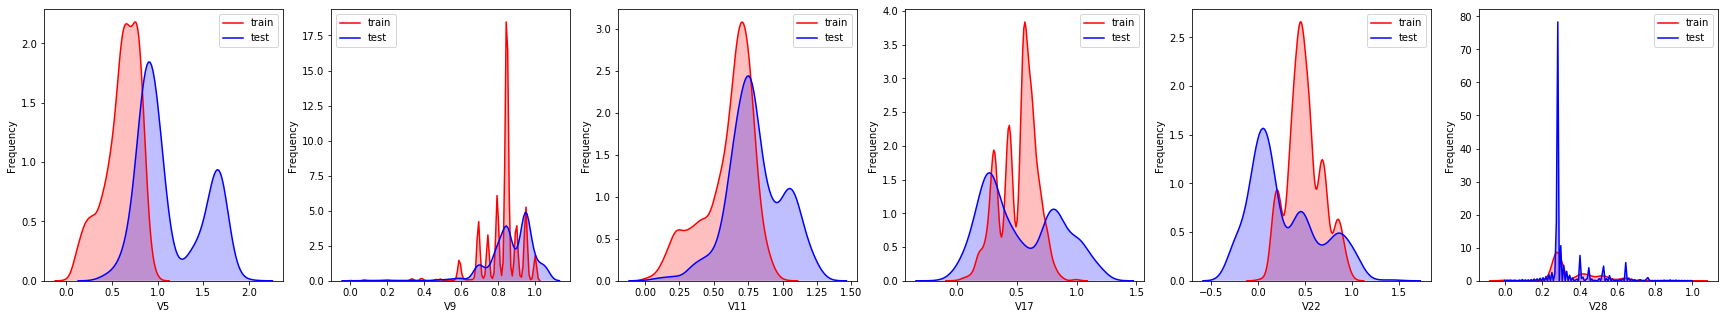

In [181]:
drop_col = 6
drop_row = 1
plt.figure(figsize=(5*drop_col,5*drop_row))

for i,col in enumerate(['V5','V9','V11','V17','V22','V28']):
    ax = plt.subplot(drop_row,drop_col,i+1)
    ax = sns.kdeplot(train_data_scaler[col],color='red',shade=True)
    ax = sns.kdeplot(test_data_scaler[col],color='Blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['train','test'])

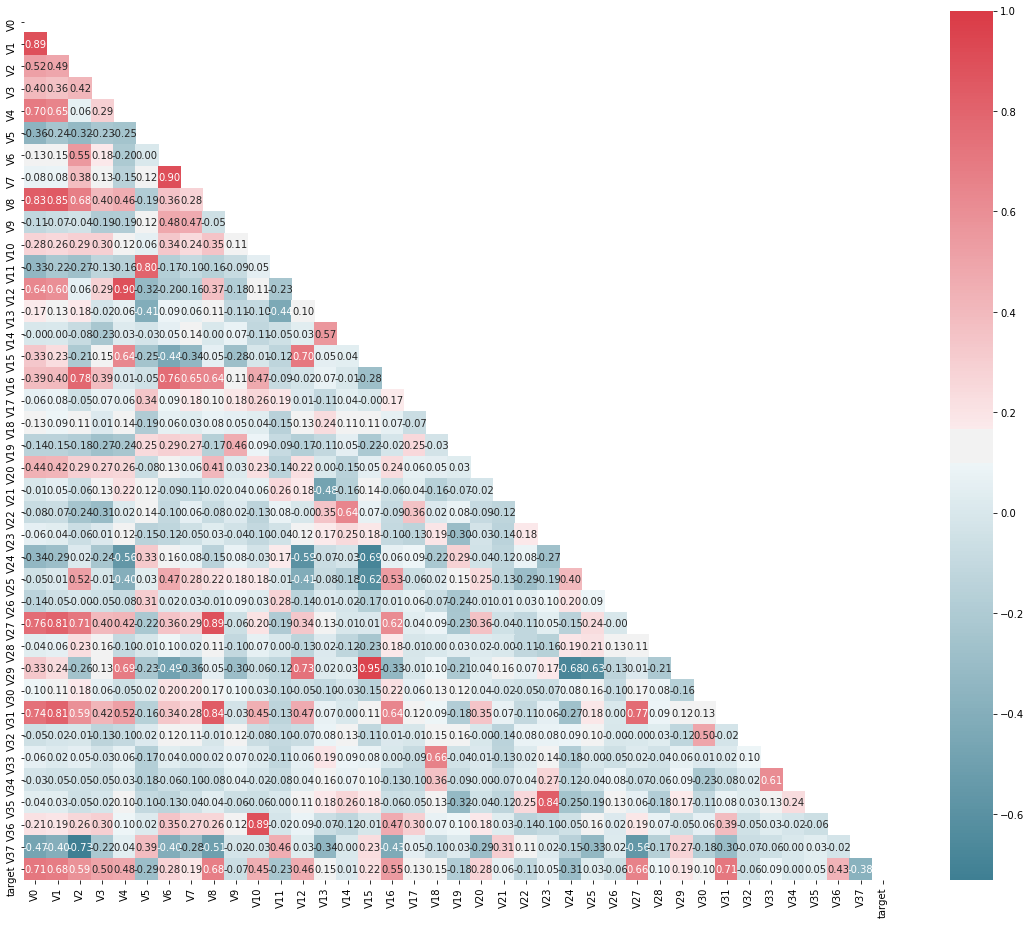

In [182]:
plt.figure(figsize=(20,16))
column = train_data_scaler.columns.tolist()
mcorr = train_data_scaler[column].corr(method='spearman')
mask = np.zeros_like(mcorr,dtype=np.bool)

mask[np.triu_indices_from(mask)]=True  #返回方阵的上三角矩阵的索引
cmap = sns.diverging_palette(220,10,as_cmap=True)
g=sns.heatmap(mcorr,mask=mask,cmap=cmap,square=True,annot=True,fmt='0.2f')

In [183]:
#  计算相关性系数并筛选大于0.1的特征变量
mcorr = mcorr.abs()
numerical_corr=mcorr[mcorr['target']>0.1]['target']
numerical_corr

V0        0.712403
V1        0.682909
V2        0.585850
V3        0.501622
V4        0.478683
            ...   
V30       0.101378
V31       0.711636
V36       0.425991
V37       0.376443
target    1.000000
Name: target, Length: 28, dtype: float64

In [184]:
# index0 = numerical_corr.sort_values(ascending=False).index
# print(train_data_scaler[index0].corr('spearman'))

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 多重共线性方差膨胀因子
"""
 多重线性分析的原则是特征组之间的相关性系数较大，即每个特征变量与其他特征变量之间的相关性系数较大，
 故可能存在较大的共线性影响，这会导致模型估计不准确，因此后续要使用PCA对数据进行处理，去除多重共线性
"""
# 多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor #多重共线性方差膨胀因子

#多重共线性
new_numerical=['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10','V11','V13', 'V15', 'V16', 'V18', 'V19', 'V20','V22','V24','V30', 'V31', 'V37']
X=np.matrix(train_data_scaler[new_numerical])
VIF_list=[variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656465,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.50166642638334,
 19.920315849901424,
 24.640481765008683,
 11.816055964845381,
 4.958208708452915,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

In [186]:
# 利用PCA方法去除数据的多重共线性，并进行降维，PCA处理后可保持90%的信息数据

# 保持90%的信息
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)

print(test_data_scaler.shape)
print(train_data_scaler.iloc[:,0:-1])
# pca = pca.fit(train_data_scaler.iloc[:,0:-1])
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']

new_train_pca_90.describe()

(1925, 38)
            V0        V1        V2        V3        V4  ...       V33  \
0     0.759139  0.729830  0.524488  0.680337  0.698964  ...  0.000000   
1     0.821406  0.789631  0.557939  0.705130  0.664244  ...  0.374950   
2     0.828377  0.808239  0.584987  0.674567  0.653210  ...  0.374950   
3     0.785006  0.779830  0.592670  0.642601  0.718746  ...  0.374950   
4     0.777416  0.818182  0.588988  0.649462  0.683488  ...  0.374950   
...        ...       ...       ...       ...       ...  ...       ...   
2881  0.700898  0.724006  0.525288  0.641977  0.718880  ...  0.482957   
2882  0.750000  0.806676  0.594750  0.645408  0.709460  ...  0.534086   
2883  0.610440  0.625142  0.469750  0.629970  0.656439  ...  0.534086   
2884  0.637546  0.687500  0.492318  0.609231  0.698560  ...  0.545482   
2885  0.728470  0.781534  0.511364  0.609231  0.689140  ...  0.511395   

           V34       V35       V36       V37  
0     0.000000  0.074074  0.000000  0.018401  
1     0.499949  0.

AttributeError: 'PCA' object has no attribute '_validate_data'

In [190]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca1 = PCA(n_components=2)
newX = pca1.fit_transform(X)

AttributeError: 'PCA' object has no attribute '_validate_data'

In [187]:
pca = PCA(n_components=0.95)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

AttributeError: 'PCA' object has no attribute '_validate_data'

In [188]:
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

AttributeError: 'PCA' object has no attribute '_validate_data'